<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'/content'

In [3]:
with open('drive/MyDrive/DATA/One.txt') as mytext:
    words_one= mytext.read().lower().split()
    uni_words_one = set(words_one)

In [4]:
uni_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [5]:
with open('drive/MyDrive/DATA/Two.txt') as mytext:
    words_two = mytext.read().lower().split()
    uni_words_two = set(words_two)
    

In [6]:
uni_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [7]:
all_uni_words = set()
all_uni_words.update(uni_words_one)

In [8]:
all_uni_words.update(uni_words_two)

In [9]:
all_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [10]:
full_vocab = dict()
i=0
for word in all_uni_words:
    full_vocab[word]=i
    i=i+1

In [11]:
full_vocab

{'a': 9,
 'about': 3,
 'animals': 5,
 'are': 13,
 'canine': 10,
 'catching': 4,
 'dogs': 11,
 'fun': 1,
 'furry': 18,
 'is': 8,
 'our': 2,
 'pets': 6,
 'popular': 14,
 'sport': 17,
 'story': 12,
 'surfing': 15,
 'this': 0,
 'water': 16,
 'waves': 7}

In [12]:
one_freq=[0]*len(full_vocab)
two_freq =[0]*len(full_vocab)
all_words=['']*len(full_vocab)

In [13]:
one_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [15]:
with open('drive/MyDrive/DATA/One.txt') as f:
    one_text= f.read().lower().split()
    

In [16]:
for word in one_text:
    word_ind=full_vocab[word]
    one_freq[word_ind] += 1

In [17]:
one_freq

[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1]

In [18]:
with open('drive/MyDrive/DATA/Two.txt') as f:
    two_text= f.read().lower().split()

In [19]:
for word in two_text:
    word_ind=full_vocab[word]
    two_freq[word_ind] += 1

In [20]:
two_freq

[1, 1, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0]

In [21]:
for word in full_vocab:
    word_ind=full_vocab[word]
    all_words[word_ind]=word

In [22]:
all_words

['this',
 'fun',
 'our',
 'about',
 'catching',
 'animals',
 'pets',
 'waves',
 'is',
 'a',
 'canine',
 'dogs',
 'story',
 'are',
 'popular',
 'surfing',
 'water',
 'sport',
 'furry']

In [23]:
bow=pd.DataFrame(data=[one_freq,two_freq],columns=all_words)

In [24]:
bow

,this,fun,our,about,catching,animals,pets,waves,is,a,canine,dogs,story,are,popular,surfing,water,sport,furry
0,1,0,1,1,0,1,1,0,1,1,1,2,1,1,0,0,0,0,1
1,1,1,0,1,1,0,0,1,3,1,0,0,1,0,1,2,1,1,0


## Feature Extraction : Using Sklearn

In [25]:
text=['This is a line',
      'This is another line',
      'Completely different line']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [27]:
cv=CountVectorizer()

In [28]:
sparse_matrix= cv.fit_transform(text)

In [29]:
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]])

In [30]:
cv.vocabulary_

{'another': 0, 'completely': 1, 'different': 2, 'is': 3, 'line': 4, 'this': 5}

In [31]:
tfidf = TfidfTransformer()

In [32]:
results=tfidf.fit_transform(sparse_matrix) # BOW ---> TF-IDF

In [33]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tv=TfidfVectorizer()

In [36]:
tv_results = tv.fit_transform(text)

In [38]:
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

## Classification of Text

In [41]:
df=pd.read_csv('drive/MyDrive/DATA/airline_tweets.csv')

In [42]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

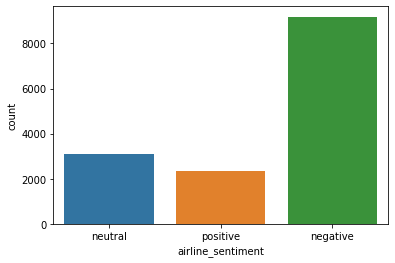

In [45]:
sns.countplot(data=df, x='airline_sentiment')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

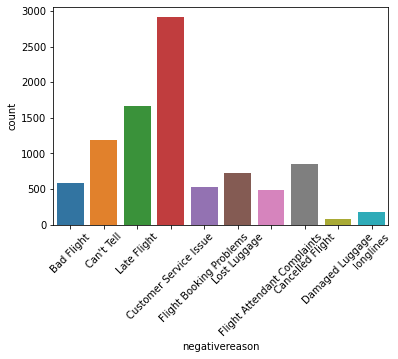

In [52]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation =45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

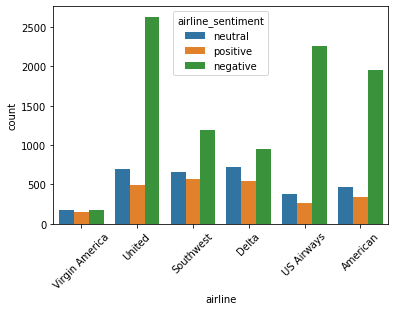

In [54]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.xticks(rotation=45)

In [55]:
data = df[['airline_sentiment','text']]

In [56]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [57]:
X= data['text']

In [58]:
y=data['airline_sentiment']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
tfidf = TfidfVectorizer(stop_words='english')

In [62]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [63]:
X_train_tfidf = tfidf.transform(X_train)

In [65]:
X_test_tfidf = tfidf.transform(X_test)

In [66]:
X_train_tfidf

<11712x12987 sparse matrix of type '<class 'numpy.float64'>'
	with 106745 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
nb=MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
from sklearn.svm import SVC, LinearSVC

In [75]:
svc=SVC()
svc.fit(X_train_tfidf, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
linear_svc=LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [78]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [79]:
def report(model):
    preds=model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1889
     neutral       0.75      0.15      0.25       580
    positive       0.94      0.18      0.31       459

    accuracy                           0.70      2928
   macro avg       0.79      0.44      0.46      2928
weighted avg       0.74      0.70      0.62      2928



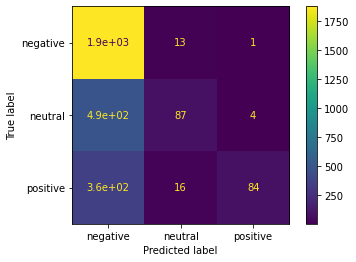

In [80]:
report(nb)

              precision    recall  f1-score   support

    negative       0.82      0.93      0.88      1889
     neutral       0.66      0.48      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928



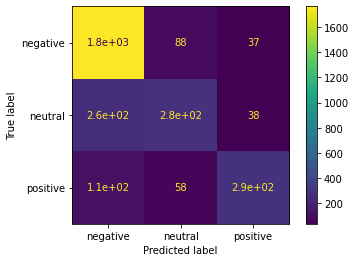

In [81]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.81      0.95      0.87      1889
     neutral       0.68      0.42      0.52       580
    positive       0.80      0.61      0.69       459

    accuracy                           0.79      2928
   macro avg       0.76      0.66      0.69      2928
weighted avg       0.78      0.79      0.77      2928



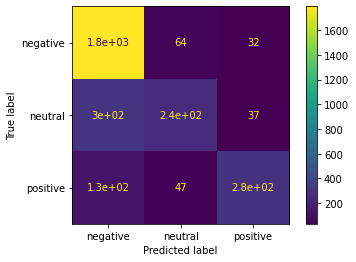

In [82]:
report(svc)

              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1889
     neutral       0.64      0.54      0.58       580
    positive       0.76      0.67      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



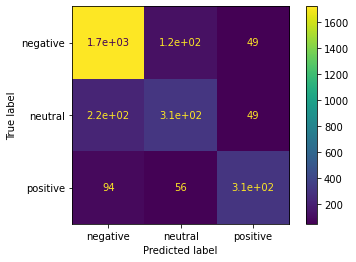

In [83]:
report(linear_svc)

In [84]:
from sklearn.pipeline import Pipeline

In [88]:
pipe=Pipeline([('tfidf', TfidfVectorizer()),
                ('svc', LinearSVC())])

In [89]:
pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [90]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)